In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.metrics import calinski_harabaz_score,silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/credit-card-data.csv"
cc = pd.read_csv(path)

#**Exploratory Data Analysis** 

In [ ]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
cc.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
cc.shape

(8950, 18)

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#Data Cleaning
#As we will observe now, "CASH_ADVANCE_FREQUENCY" has some frequency values <1 which can't be possible. Hence we will perform data cleaning to render this error.
cc.loc[(cc['CASH_ADVANCE_FREQUENCY']>1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [ ]:
#dropping the records with frequency higher that 1
cc = cc[(cc[['CASH_ADVANCE_FREQUENCY']] <= 1).all(axis=1)]

##**Missing Value Analysis**

In [ ]:
mv = pd.DataFrame(cc.isnull().sum())
mv

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
#Calculate Percentage
mv[0] = (mv[0]/len(cc))*100
mv

,0
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [ ]:
#As seen above, we observe there are only two variables with missing values and their percentage is 0.01% and 3.5% respectively.
#It is way below the threshold percentage of 30% to be removed as a variable. Hence, we will be imputing the missing values using mean method as performed in R
cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].mean(),inplace=True)
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].mean(),inplace=True)
print (cc.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## **Feature Selection**

In [ ]:
#We will drop the first column "CUST_ID" as it will not help us in our custering analysis
cc = cc.drop(['CUST_ID'], axis = 1) 
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.081082,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Text(0.5, 1.0, 'Correlations')

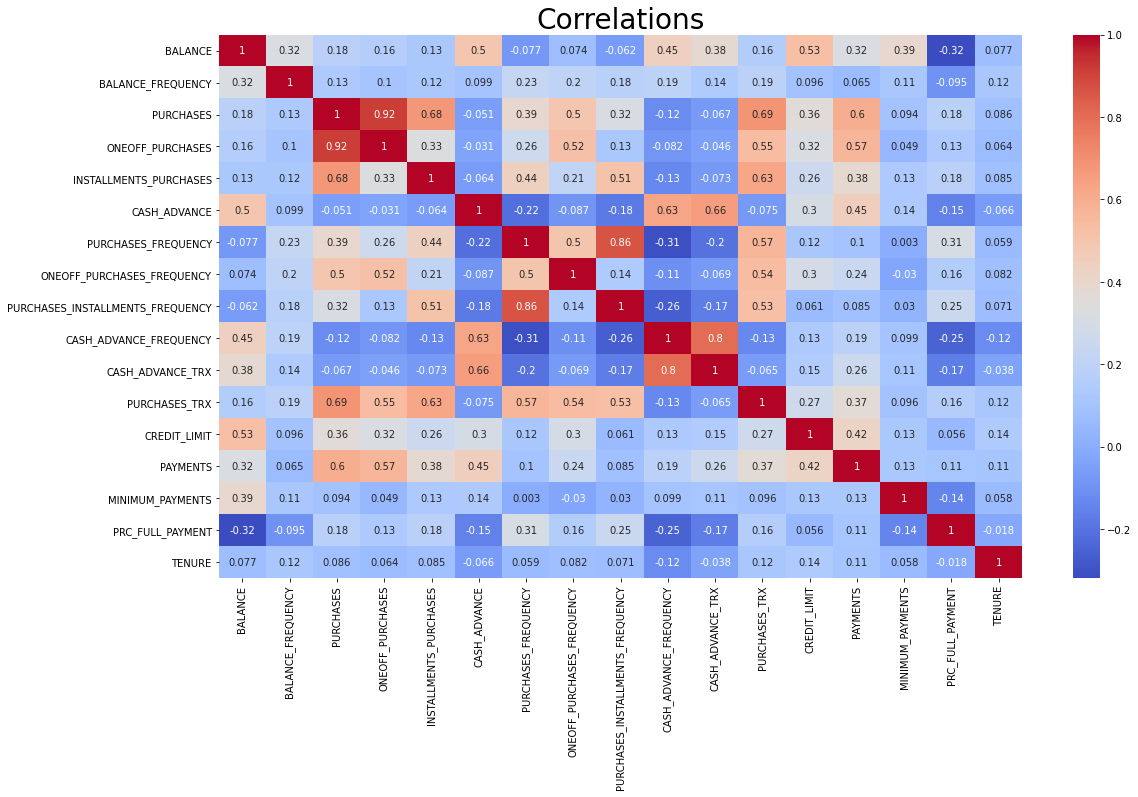

In [ ]:
#Correlation Analysis
plt.figure(figsize=(18,10))
sns.heatmap(cc.corr(),cmap='coolwarm',annot=True)
plt.title('Correlations', size = 28)

## **Data Visualisation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa21dbbe4e0>,
      dtype=object)

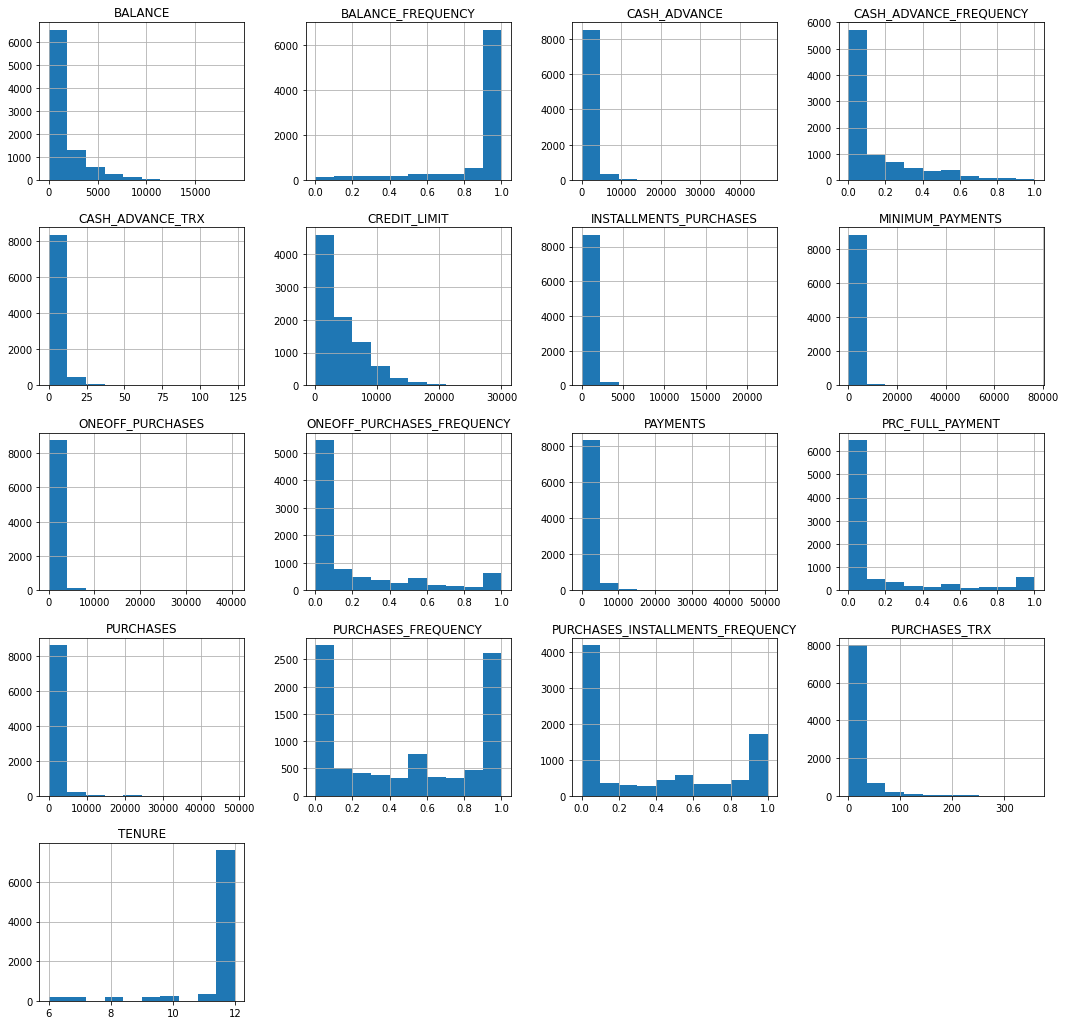

In [ ]:
cc.hist(figsize=(18,18))


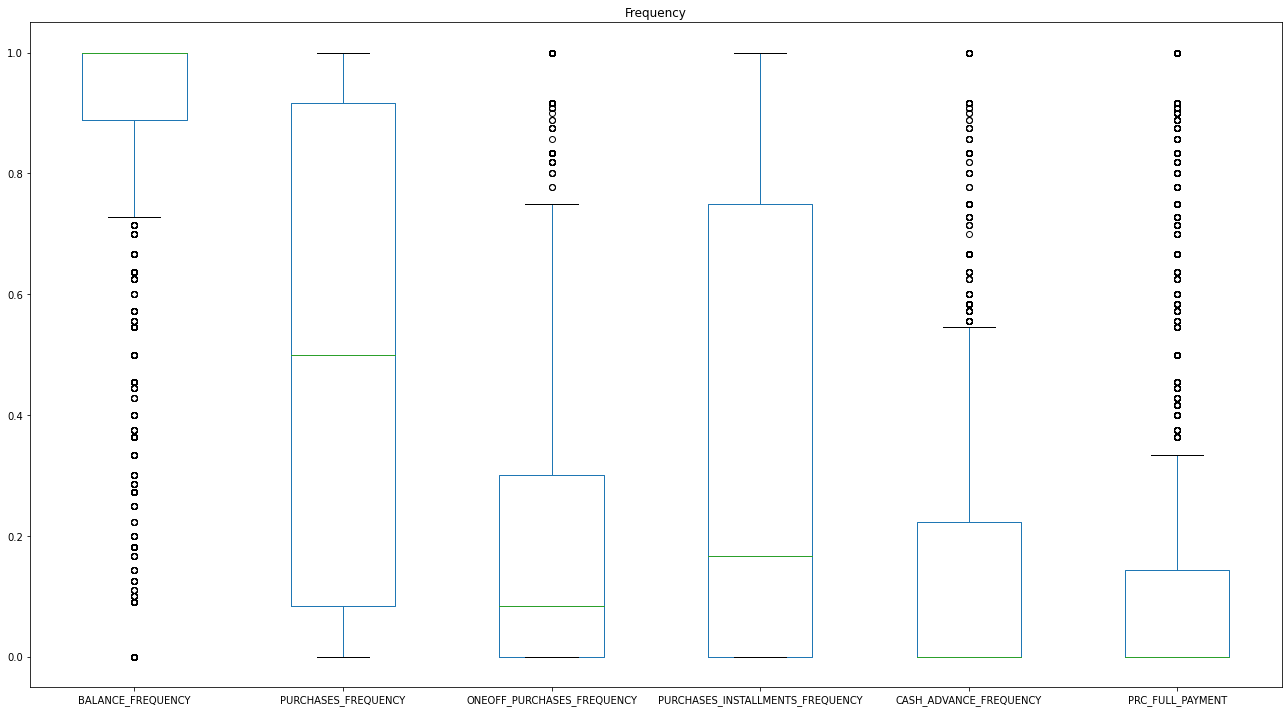

In [ ]:
#Distribution of categorical variables
cc[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True)
plt.tight_layout()

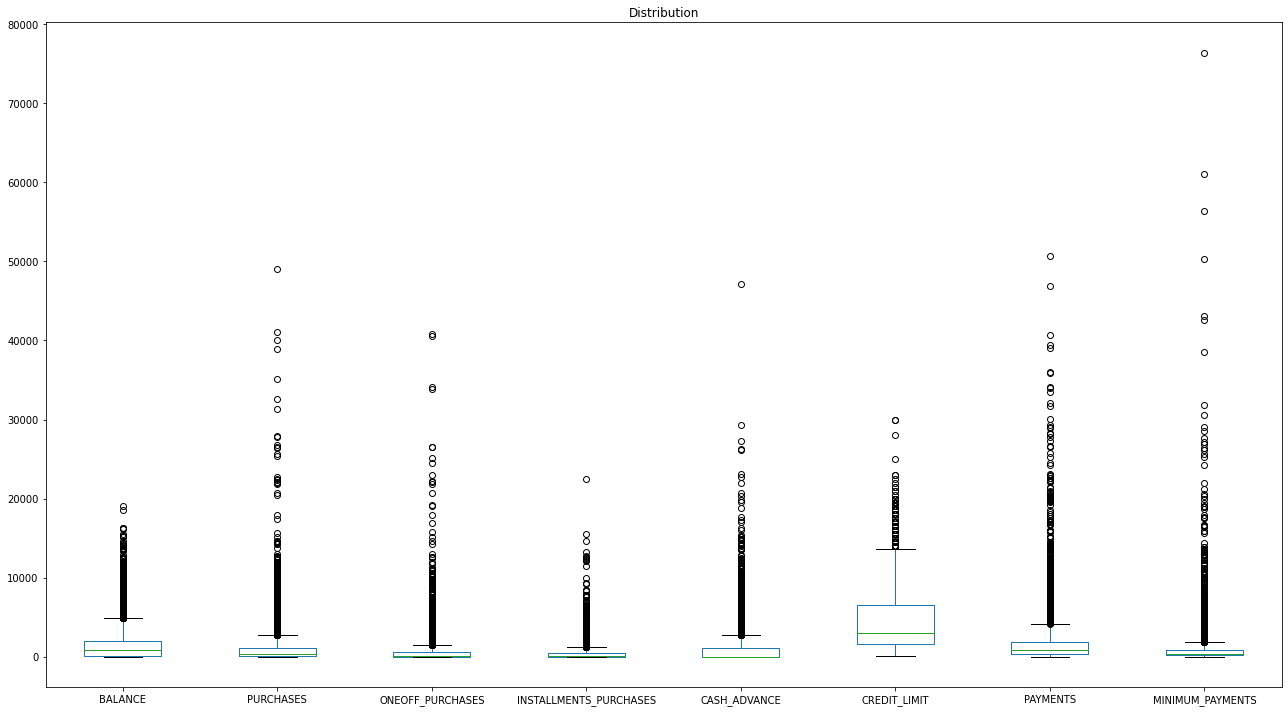

In [ ]:
#Distribution of continuous variables

cc[['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS'
]].plot.box(figsize=(18,10),title='Distribution',legend=True)
plt.tight_layout()

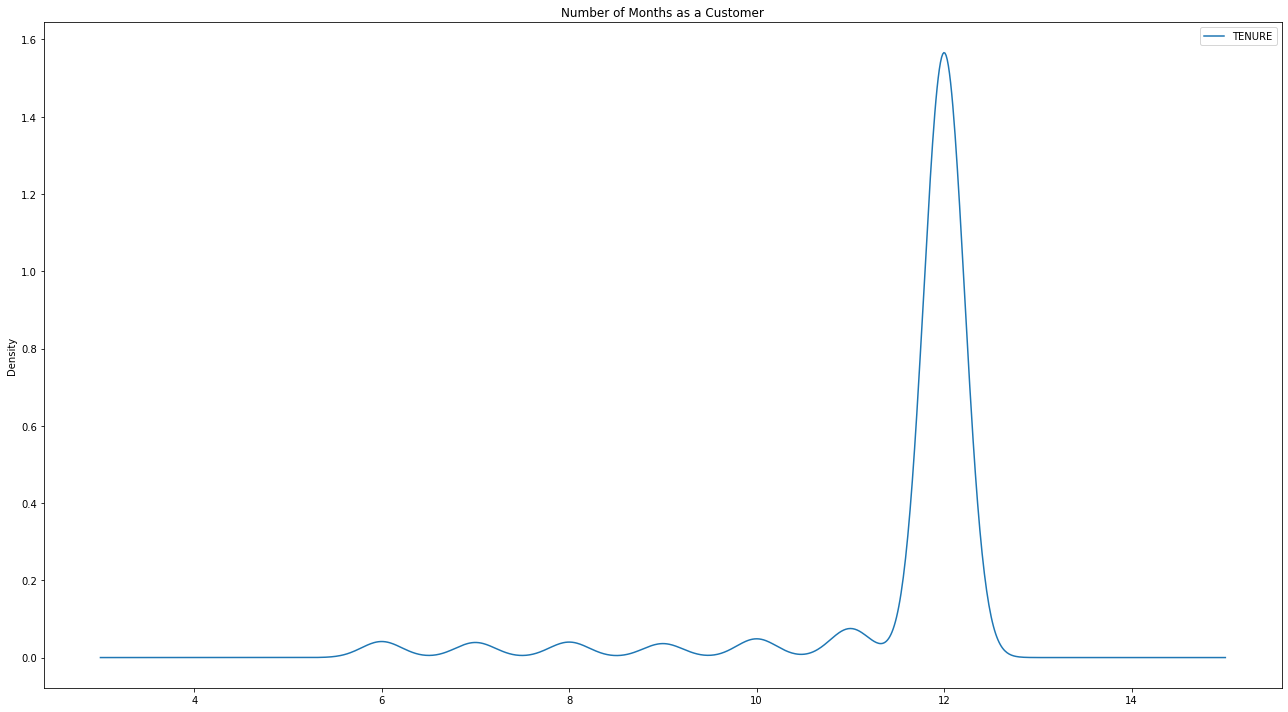

In [ ]:
#Tenure Distribution
cc[['TENURE']].plot.kde(figsize=(18,10),title='Number of Months as a Customer',legend=True);
plt.tight_layout()

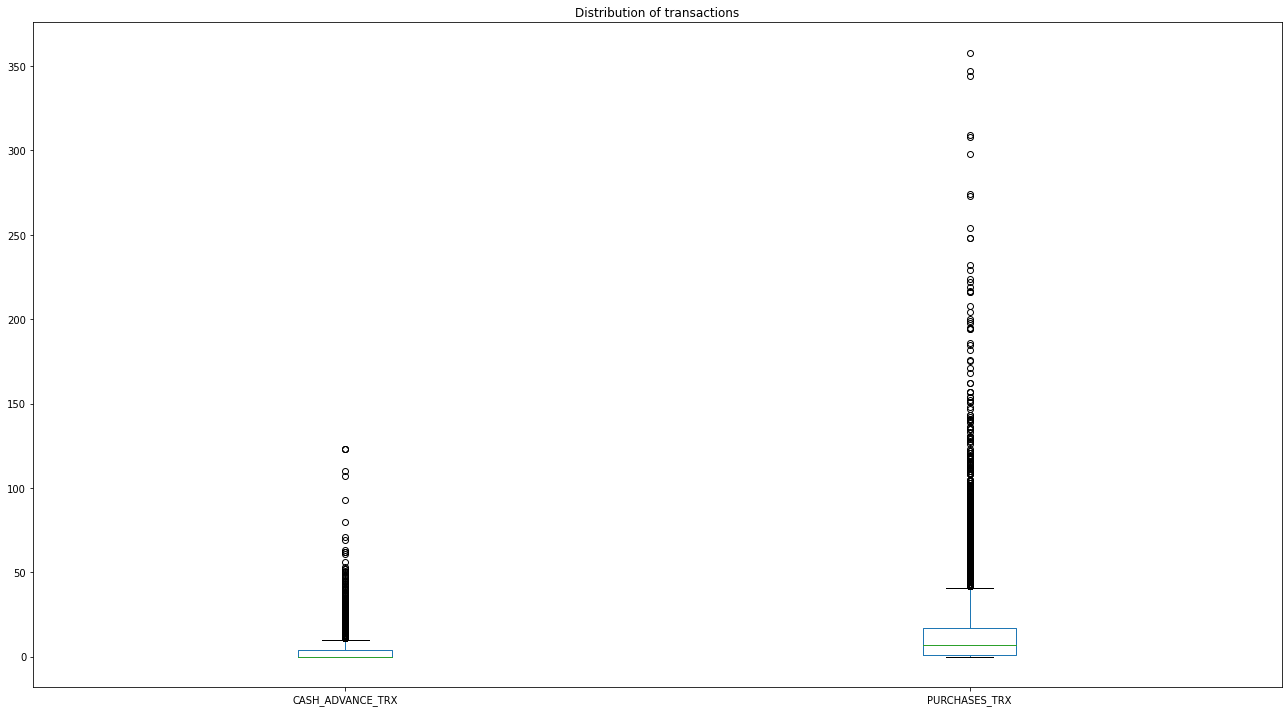

In [ ]:
#Distribution of numeric variables of transactions
cc[[ 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX'
]].plot.box(figsize=(18,10),title='Distribution of transactions',legend=True);
plt.tight_layout()

## **Finding KPIs for segmentation analysis**

In [ ]:
#Monthly_avg_purchas
cc['Monthly_avg_purchase']=cc['PURCHASES']/cc['TENURE']

#Monthly_cash_advance Amount
cc['Monthly_cash_advance']=cc['CASH_ADVANCE']/cc['TENURE']


In [ ]:
cc['TENURE'].head()

0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64

In [ ]:
cc['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [ ]:
cc['PURCHASES'].head()

0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64

In [ ]:
cc['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [ ]:
cc[cc['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4299

In [ ]:
#Purchase Type: finding what type of purchases customers are making on credit card
#From the data given to us we find that there are 4 types of purchase behaviours in the data set. Hence, we will derive a categorical variable based on their behaviour

def purchase(cc):   
    if (cc['ONEOFF_PURCHASES']==0) & (cc['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (cc['ONEOFF_PURCHASES']>0) & (cc['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (cc['ONEOFF_PURCHASES']>0) & (cc['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (cc['ONEOFF_PURCHASES']==0) & (cc['INSTALLMENTS_PURCHASES']>0):
        return 'installment'


cc['purchase_type']=cc.apply(purchase,axis=1)

In [ ]:
cc['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2039
one_off                    1869
Name: purchase_type, dtype: int64

In [ ]:
#Balance to Credit limit ratio
cc['limit_usage']=cc.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
cc['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [ ]:
#Payment to minimum payments Ratio
cc['payment_minpay']=cc.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
cc['payment_minpay'].describe()

count    8942.000000
mean        9.042468
std       118.229543
min         0.000000
25%         0.907694
50%         2.018243
75%         6.050809
max      6840.528861
Name: payment_minpay, dtype: float64

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8942 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8942 non-null   float64
 1   BALANCE_FREQUENCY                 8942 non-null   float64
 2   PURCHASES                         8942 non-null   float64
 3   ONEOFF_PURCHASES                  8942 non-null   float64
 4   INSTALLMENTS_PURCHASES            8942 non-null   float64
 5   CASH_ADVANCE                      8942 non-null   float64
 6   PURCHASES_FREQUENCY               8942 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8942 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8942 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8942 non-null   float64
 10  CASH_ADVANCE_TRX                  8942 non-null   int64  
 11  PURCHASES_TRX                     8942 non-null   int64  
 12  CREDIT

## **Outlier Analysis**

In [ ]:
#Log tranformation
cc_log=cc.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
cc_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000
mean,6.159660,0.619884,4.901012,3.204122,3.355403,3.314818,0.361475,0.158725,0.270313,0.112913,0.815685,1.895685,8.094300,6.624444,5.950855,0.117836,2.520012,3.051759,2.160476,0.295870,1.354489
std,2.013077,0.148642,2.916760,3.246861,3.082720,3.565004,0.277330,0.216737,0.281862,0.155490,1.007743,1.373944,0.819666,1.592255,1.179815,0.211682,0.129821,2.002918,2.427982,0.250309,0.940995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.860106,0.635989,3.708866,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951272,5.146202,0.000000,2.564949,1.487317,0.000000,0.040591,0.645895
50%,6.771280,0.693147,5.895243,3.663562,4.505515,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754952,5.815503,0.000000,2.564949,3.495573,0.000000,0.264099,1.104675
75%,7.624446,0.693147,7.013866,6.362183,6.152956,7.014911,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.551596,6.762823,0.133531,2.564949,4.587795,4.600915,0.540835,1.953142
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.693147,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [ ]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cc_pre=cc_log[[x for x in cc_log.columns if x not in col ]]
cc_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

## **KPI Insights**

In [ ]:
#Average payment_minpayment ratio for each purchse type
x=cc.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
print(type(x))
# this will give the value of mean payment_minpay for each purchase_type.
x.values

<class 'pandas.core.series.Series'>


array([ 7.23117678, 13.24507526, 10.09030562,  5.50586713])

Text(0.5, 1.0, 'Mean payment to minpayment ratio for each purchse type')

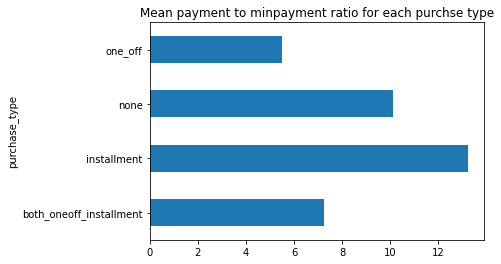

In [ ]:
cc.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay'])).plot.barh()
plt.title('Mean payment to minpayment ratio for each purchse type')

In [ ]:
cc.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).values

array([ 67.82198527,  38.3982058 , 182.59180804,  77.76507082])

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type: Both, None,Installment, One_Off')

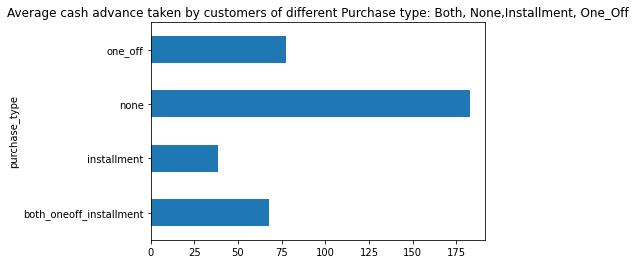

In [ ]:
cc.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type: Both, None,Installment, One_Off')

In [ ]:
# Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score
cc.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).values

array([0.3535485 , 0.2716782 , 0.57343204, 0.38036302])

Text(0.5, 1.0, 'Average customer with good credit score of different Purchase type : Both, None,Installment,One_Off')

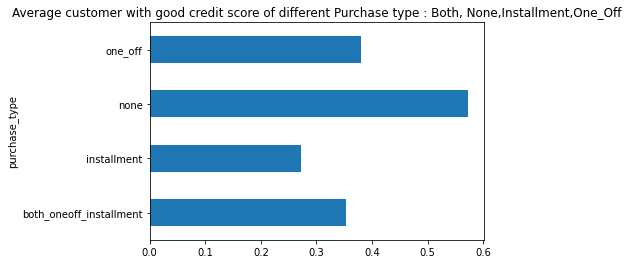

In [ ]:
cc.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()
plt.title('Average customer with good credit score of different Purchase type : Both, None,Installment,One_Off')

In [ ]:
#Original dataset with categorical column converted to number type
cc_copy=pd.concat([cc,pd.get_dummies(cc['purchase_type'])],axis=1)

## **Machine Learning Model**

In [ ]:
#Creating Dummies for categorical variable
cc_pre['purchase_type']=cc.loc[:,'purchase_type']
pd.get_dummies(cc_pre['purchase_type']).head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
#Merge the created dummy with the original data frame cc_dummy
cc_dummy=pd.concat([cc_pre,pd.get_dummies(cc_pre['purchase_type'])],axis=1)

In [ ]:
#Drop the categorical purchase_type
l = ['purchase_type']
cc_dummy=cc_dummy.drop(l,axis=1)
cc_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
both_oneoff_installment             0
installment                         0
none                                0
one_off                             0
dtype: int64

Text(0.5, 1.0, 'Correlations')

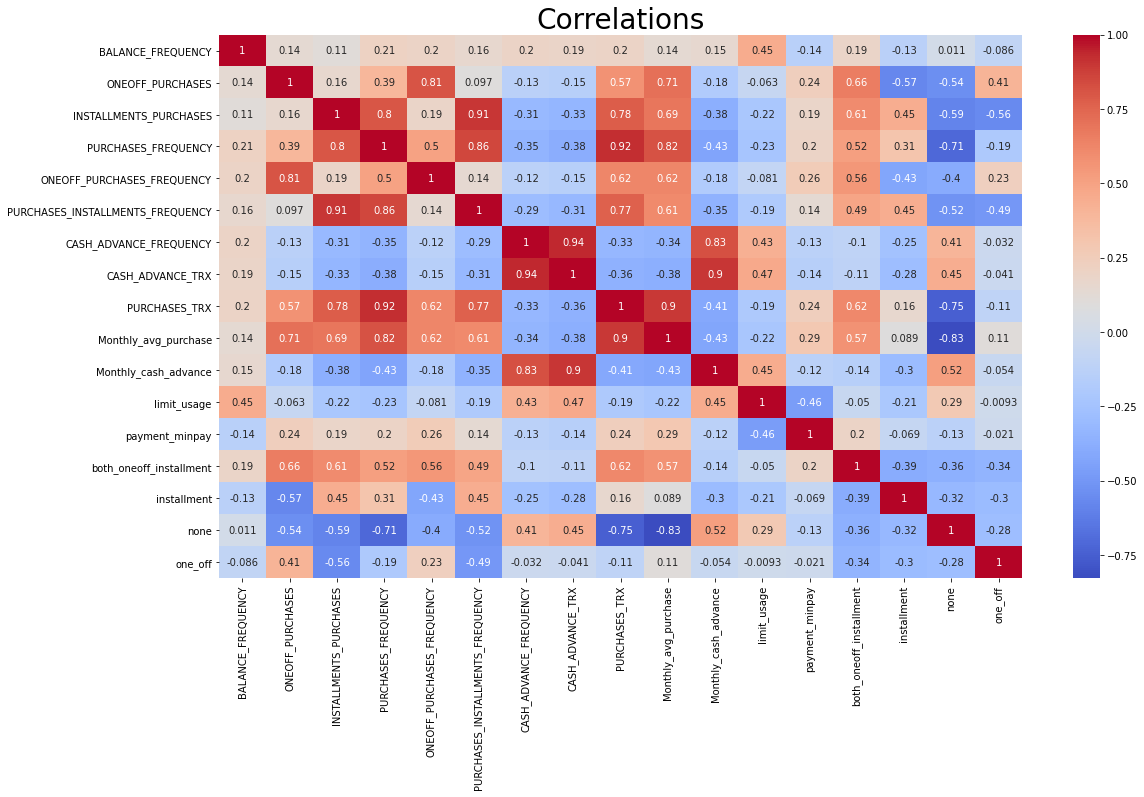

In [ ]:
#Lets take a look at how the  variables are correlated for the dataframe cc_dummy
plt.figure(figsize=(18,10))
sns.heatmap(cc_dummy.corr(),cmap='coolwarm',annot=True)
plt.title('Correlations', size = 28)

In [ ]:
#Scaling data
#Fit on the data and transform
sc=StandardScaler()
cc_scaled=sc.fit_transform(cc_dummy)

In [ ]:
cc_dummy.shape

(8942, 17)

In [ ]:
#APPLYING PCA
#There are 17 features so n_component should be 17.
pc=PCA(n_components=17)
cc_pca=pc.fit(cc_scaled)

In [ ]:
#Checking how much variance can be explained by the 17 features
sum(cc_pca.explained_variance_ratio_)

1.0

In [ ]:
#Getting the variance ratio to find out how many components for pca is going to be used to explain almost 90% of all features while reducing the fetures.
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cc_scaled)
    var_ratio[n]=sum(cc_pca.explained_variance_ratio_)

var_ratio

{2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0}

In [ ]:
#Selecting pca n_componets = 5 because after reducing to 5 features it can explain all the features upto more than 90%
pc=PCA(n_components=5)

In [ ]:
#Fit on the data
p=pc.fit(cc_scaled)

In [ ]:
p.explained_variance_

array([6.83386555, 3.06978902, 2.50724865, 1.38301952, 1.11058423])

In [ ]:
np.sum(p.explained_variance_)

14.90450697368191

In [ ]:
var_ratio

{2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0}

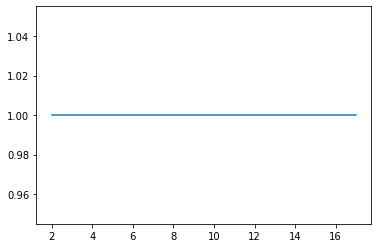

In [ ]:
#While visualization the var_ratio to find out how many componets are best fit to explaining about more than 90% variance.
#Since 6 components are explaining about 90% variance so we select 5 components
pd.Series(var_ratio).plot()

In [ ]:
pc_final=PCA(n_components=5).fit(cc_scaled)

#Fit the data and the transform
reduced_cc=pc_final.fit_transform(cc_scaled)
dd=pd.DataFrame(reduced_cc)

In [ ]:
#Results for PCA of 5 components
col_list=cc_dummy.columns
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)
#So below data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable but in our case its not

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.030226,0.240037,-0.260611,-0.351663,-0.230124
ONEOFF_PURCHASES,0.214402,0.405219,0.240086,0.000981,-0.022654
INSTALLMENTS_PURCHASES,0.311964,-0.097820,-0.316143,0.086801,-0.002676
PURCHASES_FREQUENCY,0.345861,0.015582,-0.162695,-0.075993,0.115369
ONEOFF_PURCHASES_FREQUENCY,0.214910,0.361734,0.164005,0.036121,-0.050206
PURCHASES_INSTALLMENTS_FREQUENCY,0.295361,-0.111560,-0.330375,0.021799,0.024847
CASH_ADVANCE_FREQUENCY,-0.214338,0.286993,-0.279895,0.092874,0.358916
CASH_ADVANCE_TRX,-0.229181,0.292465,-0.285496,0.098804,0.332939
PURCHASES_TRX,0.355591,0.106350,-0.102440,-0.055665,0.104782
Monthly_avg_purchase,0.346172,0.140846,0.024291,-0.080377,0.193911


In [ ]:
#Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.401947
PC_1    0.180556
PC_2    0.147469
PC_3    0.081345
PC_4    0.065321
dtype: float64

## **Clustering**

In [ ]:
#Fit the data
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
#Geting the cluster labels for each data in reduced_cc
labels = km_4.labels_
labels

array([2, 0, 3, ..., 2, 0, 3], dtype=int32)

In [ ]:
#Dropping the categorial purchase_type in new dataframe cc_2
cc_2=cc.drop(l,axis=1)
cc_2.shape

(8942, 21)

In [ ]:
#Concatenate the new dataframe cluster into new data that is clusters
clusters=pd.concat([cc_2, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1.446508,2.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,0.457495,3.826241,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0.991682,3.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.081082,0.000000,12.0,124.916667,17.149001,0.222223,0.000000,3.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,2.771075,3.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


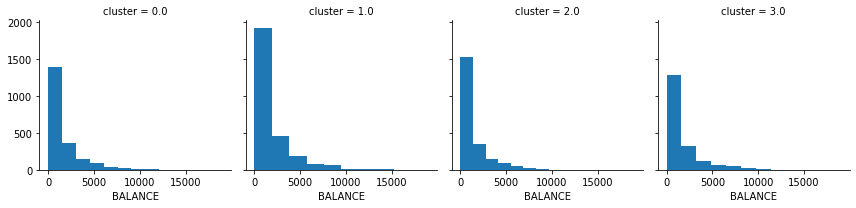

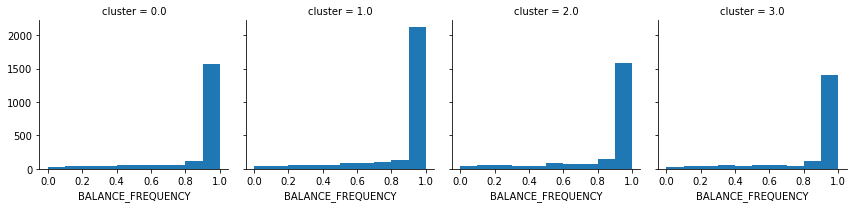

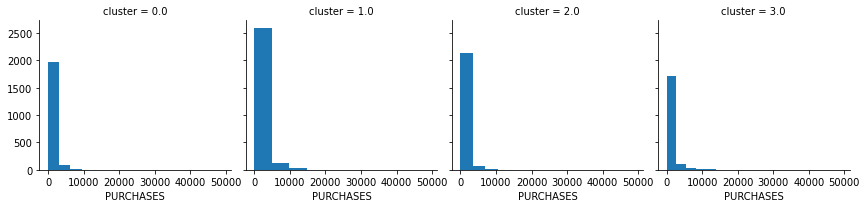

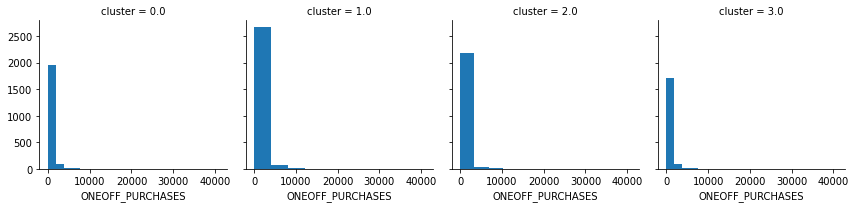

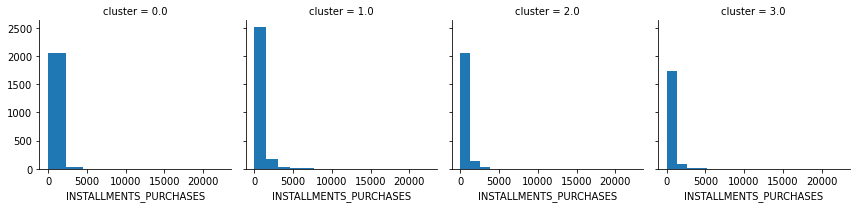

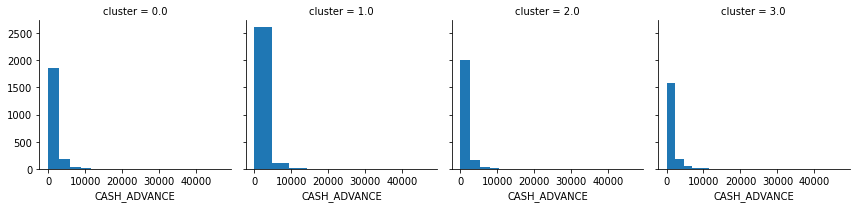

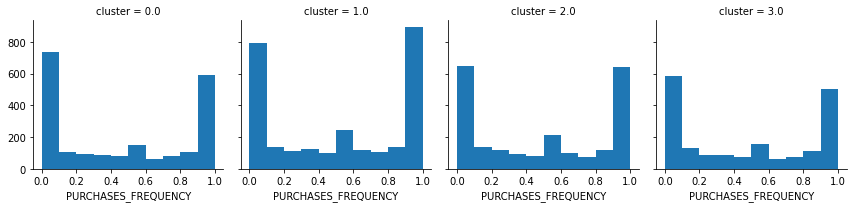

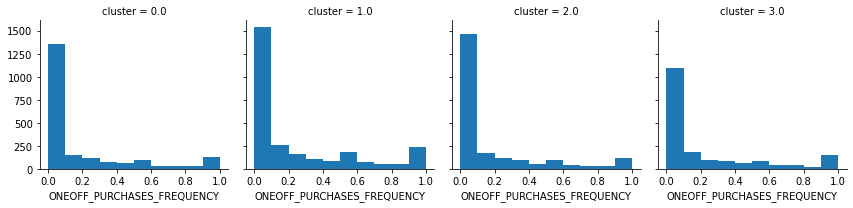

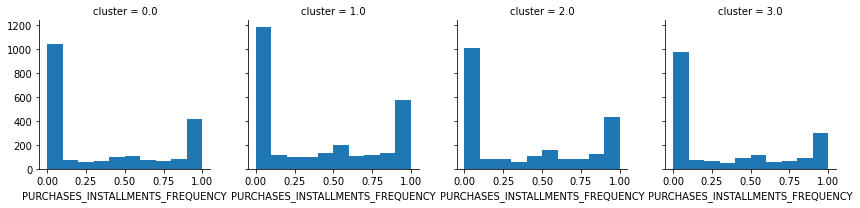

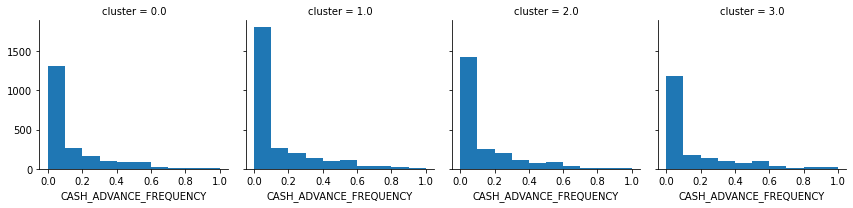

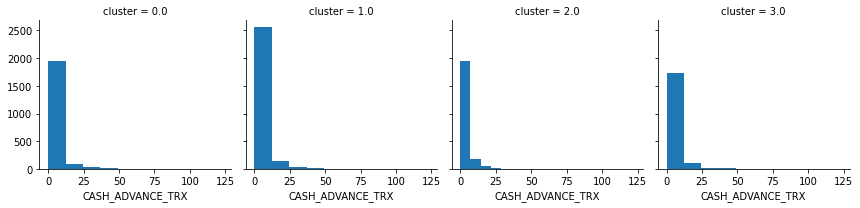

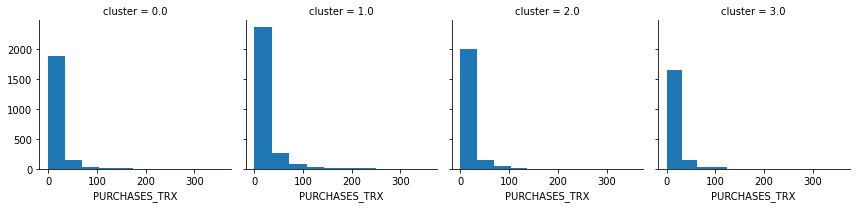

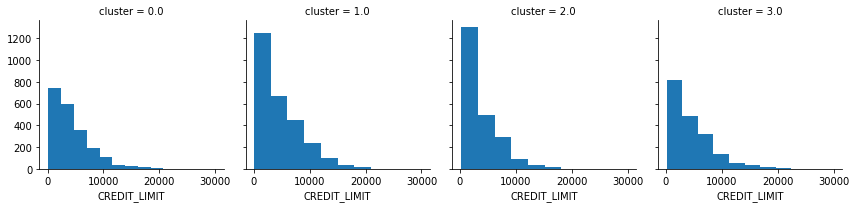

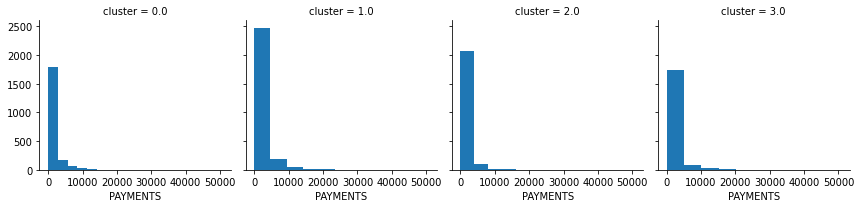

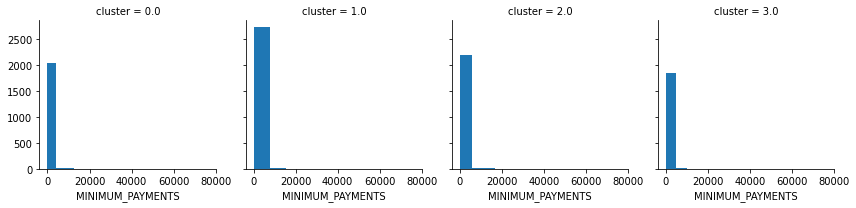

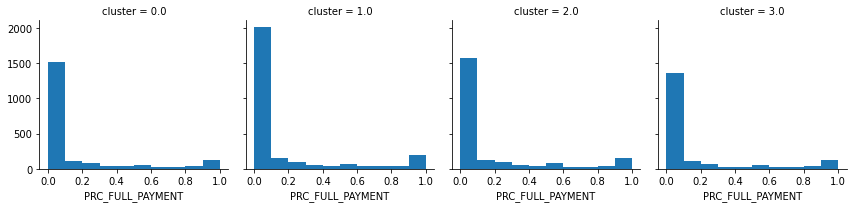

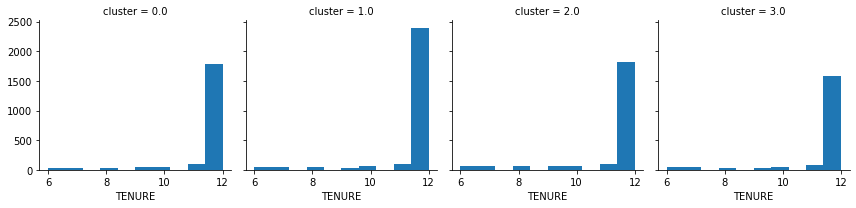

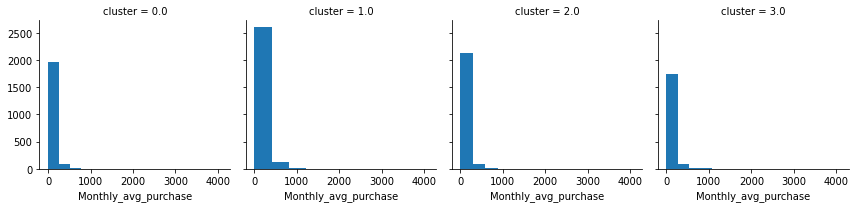

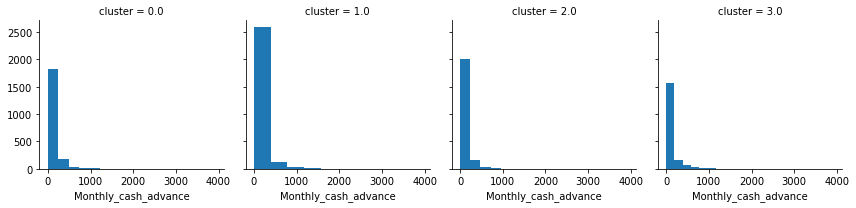

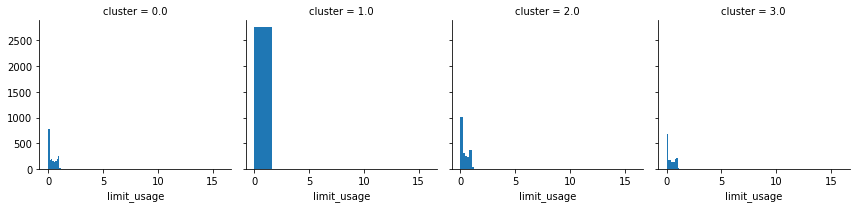

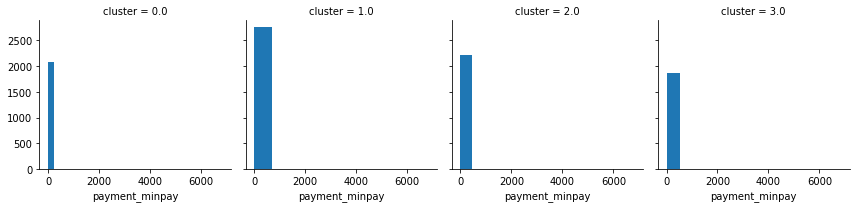

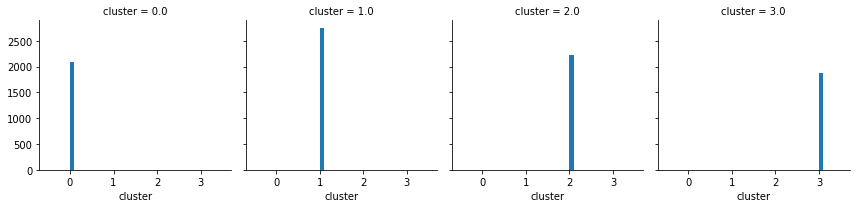

In [ ]:
#Interpreting clusters
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
#Analysing Clusters
cluster_pca = clusters.groupby('cluster').mean()
cluster_pca

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
cluster,,,,,,,,,,,,,,,,,,,,,
0.0,1558.009898,0.880551,810.042010,456.277564,354.262523,998.506370,0.466288,0.178368,0.352087,0.135597,3.241247,12.894484,4393.953145,1574.742073,833.390365,0.147595,11.579376,69.217579,89.374306,0.392936,6.971197
1.0,1745.439028,0.888489,1300.535252,783.646958,517.281978,1051.662181,0.518531,0.237588,0.392407,0.132471,3.338657,17.931034,5029.982676,2038.247225,939.694419,0.154025,11.600363,110.890107,95.313135,0.391126,9.598948
2.0,1313.817517,0.858463,828.055645,454.723757,373.518854,823.770335,0.492176,0.168370,0.377972,0.127449,2.906517,13.204944,3877.143707,1451.470387,844.025826,0.162929,11.397753,72.251603,76.223937,0.377693,8.871361
3.0,1596.255536,0.879218,995.290701,629.731354,365.638288,1026.735729,0.474377,0.218611,0.322298,0.143524,3.477796,13.869984,4555.581119,1803.980555,813.293350,0.149762,11.507758,85.635971,93.101714,0.394415,10.768787


In [ ]:
#Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cc_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.245470,-2.761959
1,-3.980801,0.159355
2,1.288445,1.494095
3,-1.048355,0.661232
4,-1.451698,-0.183328


In [ ]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster
0,-0.245470,-2.761959,2
1,-3.980801,0.159355,0
2,1.288445,1.494095,3
3,-1.048355,0.661232,3
4,-1.451698,-0.183328,3


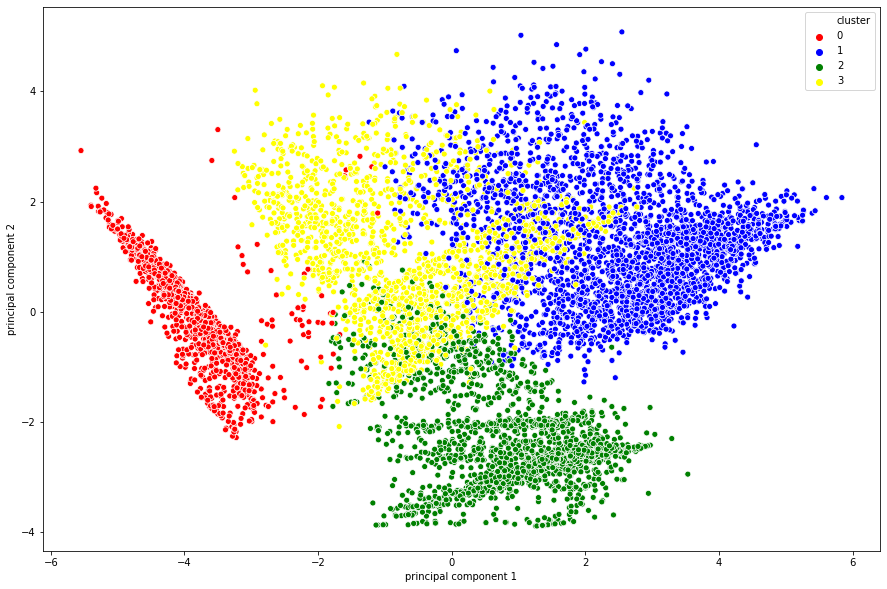

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green','yellow'])
plt.show()

In [ ]:
#Number of clients by cluster
pd.Series(km_4.labels_).value_counts()

1    2756
2    2229
0    2087
3    1870
dtype: int64

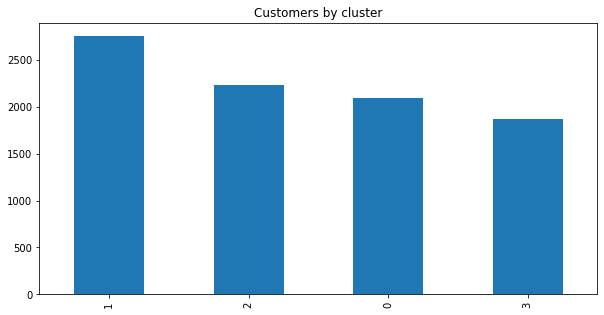

In [ ]:
pd.Series(km_4.labels_).value_counts().plot.bar(figsize=(10,5), title='Customers by cluster')

#In this bar graph we will count the number of customer for each cluster

In [ ]:
#Identifying Cluster Errors
#Figuring the best value for K in order to get the least amount of error
cluster_range = range(1,21)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(reduced_cc)
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,133261.196852
1,2,86913.795626
2,3,64396.260044
3,4,43399.548219
4,5,36674.488835
5,6,31910.524401
6,7,28534.042370
7,8,26421.903647
8,9,24091.467204
9,10,22283.117681


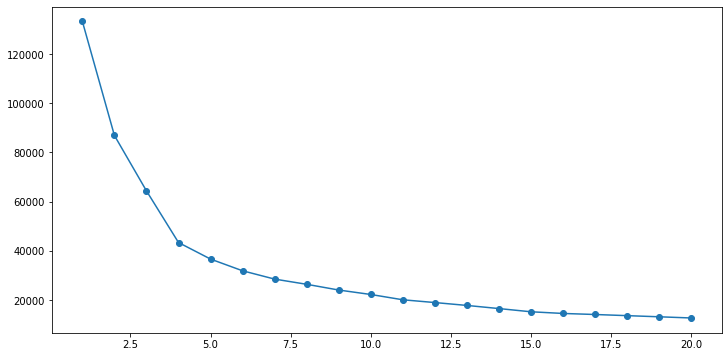

In [ ]:
#Plotting the error graph
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [ ]:
#Silhouette Coefficient
#Calculating SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cc)
    scores.append(metrics.silhouette_score(reduced_cc, km.labels_))

scores

[0.3394521566357295,
 0.37169949944366576,
 0.4594080601437572,
 0.45627130341994065,
 0.4507808798838435,
 0.43573286298710573,
 0.3758771278768413,
 0.3949654945438121,
 0.3647535846315574,
 0.3566079037633181,
 0.3854625378799432,
 0.35288887682110376,
 0.3551234021743967,
 0.35898402472771423,
 0.35167977550955803,
 0.3462434139246571,
 0.34697039123945933,
 0.34511913892654084,
 0.3373954400908487]

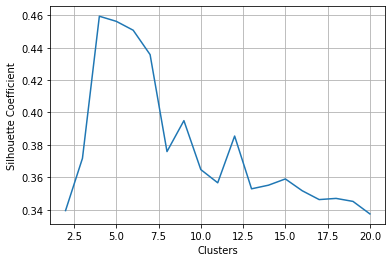

In [ ]:
#Plot the Result
plt.plot(k_range, scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

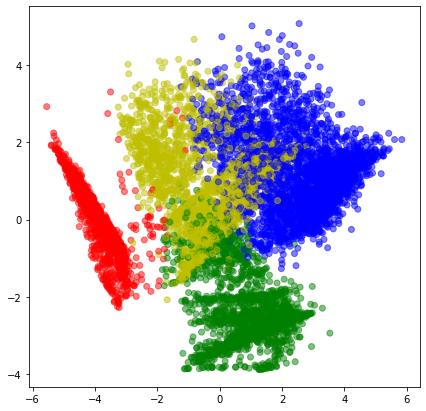

In [ ]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cc[:,0],reduced_cc[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [ ]:
df_pair_plot=pd.DataFrame(reduced_cc,columns=['PC_' +str(i) for i in range(5)])
#Add cluster column in the data frame
df_pair_plot['Cluster']=km_4.labels_ 
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,Cluster
0,-0.245470,-2.761959,0.342113,-0.397487,-0.006187,2
1,-3.980801,0.159355,-0.550328,1.023051,-0.420869,0
2,1.288445,1.494095,2.725680,-1.880131,0.013683,3
3,-1.048355,0.661232,2.511487,-1.299705,0.767289,3
4,-1.451698,-0.183328,2.295901,-1.609704,-0.563695,3


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


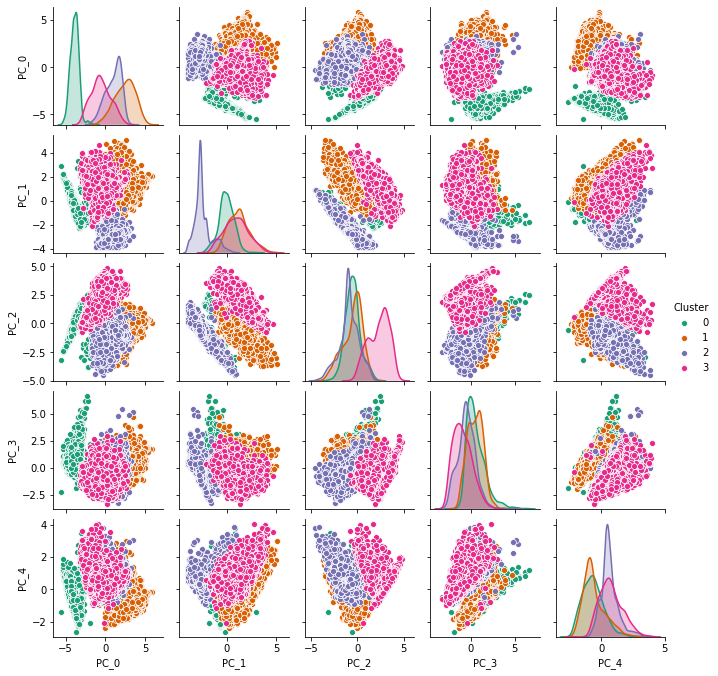

In [ ]:
#Pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
# Key performace variable selection
kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [ ]:
#Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cc_copy[kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2.0,7.950000,0.000000,0.040901,0.0,1.446508,0.0,1.0,0.0,0.0,1000.0,2.0
1,0.0,0.000000,536.912124,0.457495,4.0,3.826241,0.0,0.0,0.0,1.0,7000.0,0.0
2,12.0,64.430833,0.000000,0.332687,0.0,0.991682,0.0,0.0,1.0,0.0,7500.0,3.0
3,1.0,124.916667,17.149001,0.222223,1.0,0.000000,0.0,0.0,1.0,0.0,7500.0,3.0
4,1.0,1.333333,0.000000,0.681429,0.0,2.771075,0.0,0.0,1.0,0.0,1200.0,3.0


In [ ]:
# Mean value gives a good indication of the distribution of data. 
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[kpi].mean()).T
cluster_4

Cluster_4,0.0,1.0,2.0,3.0
PURCHASES_TRX,12.894484,17.931034,13.204944,13.869984
Monthly_avg_purchase,69.217579,110.890107,72.251603,85.635971
Monthly_cash_advance,89.374306,95.313135,76.223937,93.101714
limit_usage,0.392936,0.391126,0.377693,0.394415
CASH_ADVANCE_TRX,3.241247,3.338657,2.906517,3.477796
payment_minpay,6.971197,9.598948,8.871361,10.768787
both_oneoff_installment,0.285372,0.389474,0.262022,0.279829
installment,0.252278,0.212704,0.323146,0.227394
one_off,0.194724,0.178947,0.194157,0.286249
none,0.267626,0.218875,0.220674,0.206528


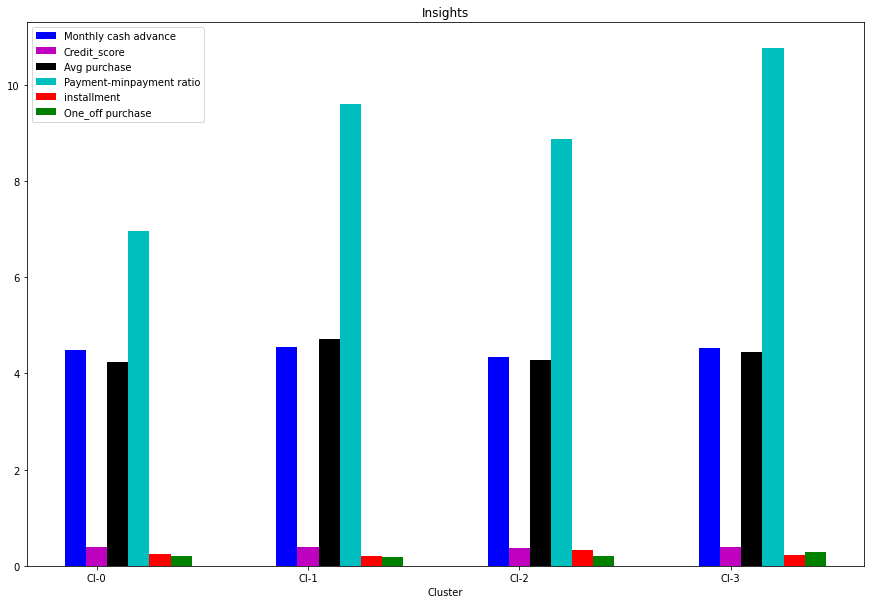

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [ ]:
#Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

Cluster_4     
0.0        0.0    2087
1.0        1.0    2756
2.0        2.0    2229
3.0        3.0    1870
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  2087   23.318436
1  2756   30.793296
2  2229   24.905028
3  1870   20.893855 



In [ ]:
cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=list(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=list(cluster_4.loc['payment_minpay',:].values)
installment=list(cluster_4.loc['installment',:].values)
one_off=list(cluster_4.loc['one_off',:].values)

In [ ]:
credit_score

[0.3929359329097791,
 0.39112629913261504,
 0.37769276424854115,
 0.39441539798583847]

In [ ]:
cash_advance

array([4.49283324, 4.55716763, 4.33367554, 4.5336926 ])

In [ ]:
payment

[6.971196690103205, 9.5989477670411, 8.871360665561777, 10.768786544759969]

In [ ]:
one_off

[0.1947242206235012,
 0.17894736842105263,
 0.19415730337078652,
 0.28624933119315144]

In [ ]:
installment

[0.25227817745803355,
 0.21270417422867513,
 0.3231460674157303,
 0.22739432851792402]

In [ ]:
purchase

array([4.23725486, 4.70853968, 4.28015451, 4.45010542])

In [ ]:
#Finding behavioural patterns between the 5 clusters
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cc)
km_5.labels_

array([3, 2, 1, ..., 3, 2, 1], dtype=int32)

In [ ]:
pd.Series(km_5.labels_).value_counts()

3    2131
2    2081
4    1983
1    1857
0     890
dtype: int64

Text(0, 0.5, 'PC_1')

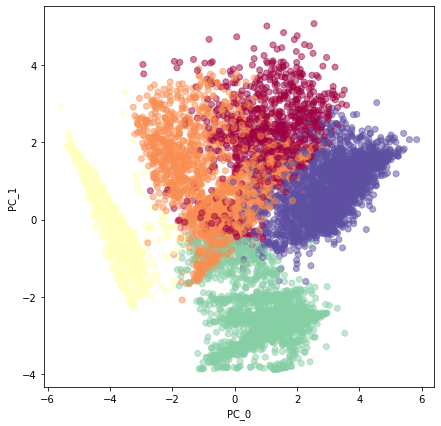

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cc[:,0],reduced_cc[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [ ]:
cluster_df_5=pd.concat([cc_copy[kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)
#Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[kpi].mean()).T

Cluster_5,0.0,1.0,2.0,3.0,4.0
PURCHASES_TRX,16.478065,13.962823,12.928812,13.083216,18.314675
Monthly_avg_purchase,100.347921,85.988683,69.420265,72.021332,113.119486
Monthly_cash_advance,129.573087,92.875813,88.137382,73.954110,82.921073
limit_usage,0.423726,0.394603,0.392889,0.374558,0.379110
CASH_ADVANCE_TRX,4.224972,3.468750,3.214526,2.847673,3.020171
payment_minpay,6.622264,10.789707,6.960589,9.067096,10.678779
both_oneoff_installment,0.363330,0.280172,0.284752,0.260461,0.395865
installment,0.232846,0.226293,0.252044,0.324401,0.209279
one_off,0.195726,0.286099,0.196248,0.192290,0.173475
none,0.208099,0.207435,0.266955,0.222849,0.221382


In [ ]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
s1

Cluster_5     
0.0        0.0     890
1.0        1.0    1857
2.0        2.0    2081
3.0        3.0    2131
4.0        4.0    1983
Name: Cluster_5, dtype: int64

In [ ]:
#Percentage of each cluster
print ("Cluster-5",'\n')
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1)

Cluster-5 



,Size,Percentage
0,890,9.944134
1,1857,20.748603
2,2081,23.251397
3,2131,23.810056
4,1983,22.156425


In [ ]:
km_6=KMeans(n_clusters=6).fit(reduced_cc)
km_6.labels_

array([1, 0, 4, ..., 1, 0, 2], dtype=int32)

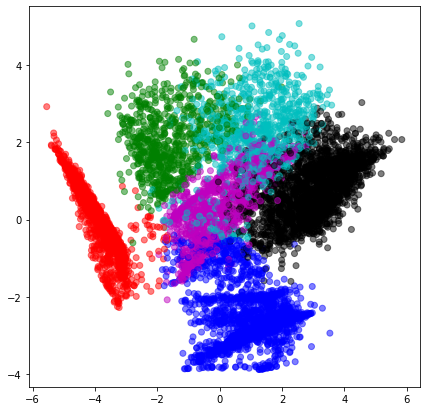

In [ ]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cc[:,0],reduced_cc[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [ ]:
cluster_df_6=pd.concat([cc_copy[kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [ ]:

six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[kpi].mean()).T
six_cluster

Cluster_6,0.0,1.0,2.0,3.0,4.0,5.0
PURCHASES_TRX,12.958997,13.079417,13.340517,16.607910,14.265427,18.300152
Monthly_avg_purchase,69.593683,71.993234,78.193280,100.592084,90.033220,113.361715
Monthly_cash_advance,87.754066,73.919357,112.106857,128.711311,82.804024,83.001964
limit_usage,0.391907,0.374490,0.429352,0.425646,0.374962,0.378827
CASH_ADVANCE_TRX,3.199228,2.846335,3.998563,4.189831,3.196957,3.027425
payment_minpay,6.907882,9.063149,14.277587,6.592405,8.793834,10.698162
both_oneoff_installment,0.286059,0.260338,0.287356,0.363842,0.274725,0.396140
installment,0.250844,0.324718,0.216954,0.230508,0.235841,0.208735
one_off,0.196334,0.192199,0.303161,0.195480,0.274725,0.173184
none,0.266763,0.222744,0.192529,0.210169,0.214708,0.221940


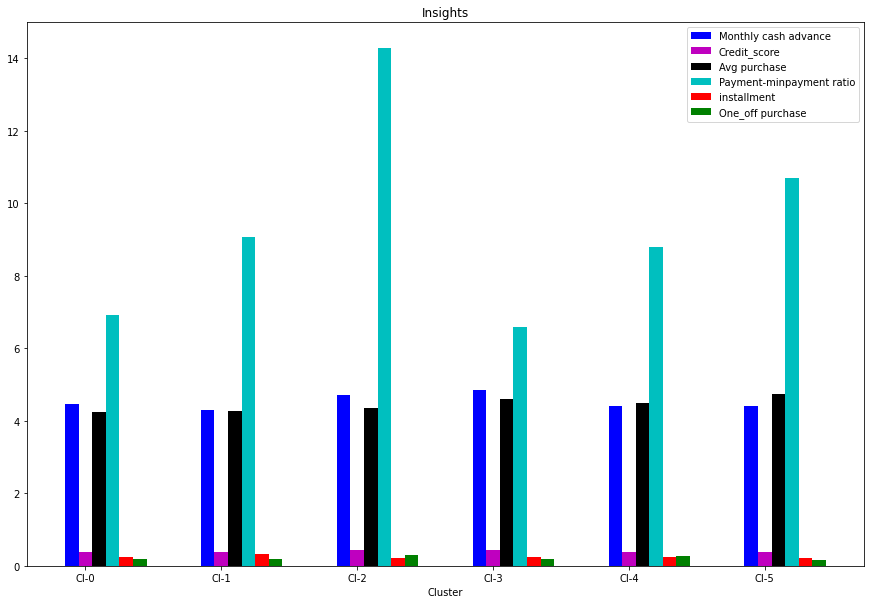

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [ ]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([4.47453819, 4.30297473, 4.7194525 , 4.85757199, 4.41647666,
       4.41886427])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

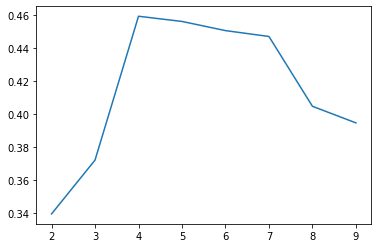

In [ ]:
#Checking performance metrics for Kmeans
score={}
score_c={}
for n in range(2,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cc)
    score_c[n]=calinski_harabaz_score(reduced_cc,km_score.labels_)
    score[n]=silhouette_score(reduced_cc,km_score.labels_)

pd.Series(score).plot()

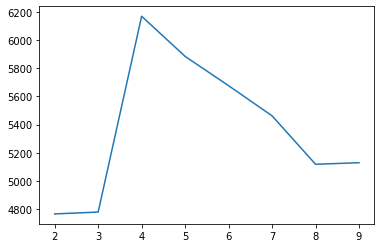

In [ ]:
pd.Series(score_c).plot()

##**Hierarchichal Clustering**

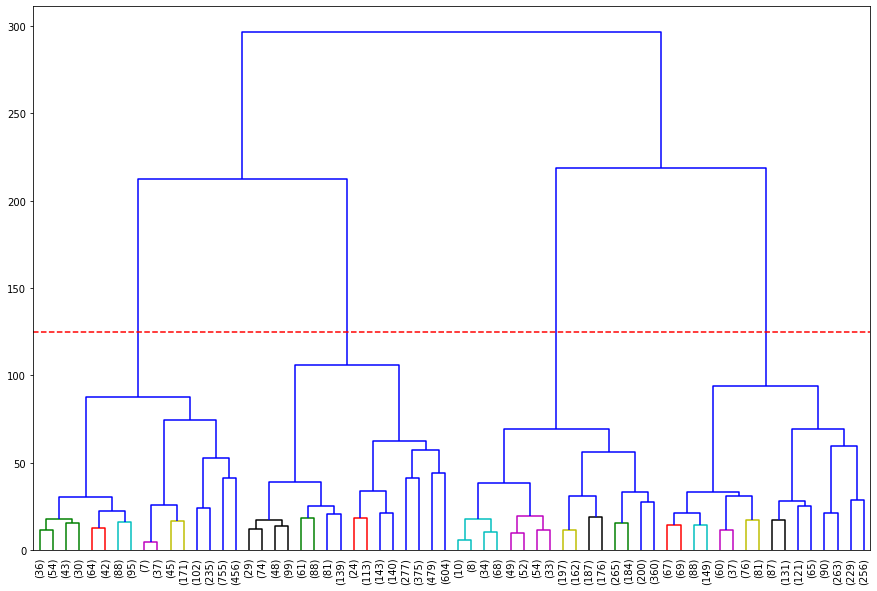

In [ ]:
Z=linkage(cc_scaled,method="ward")

plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

In [ ]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
model.fit(cc_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
model.labels_

array([3, 2, 1, ..., 3, 2, 1])

In [ ]:
clusters_agg=pd.concat([cc_copy, pd.DataFrame({'cluster':model.labels_})], axis=1)
clusters_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment,installment,none,one_off,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,installment,0.040901,1.446508,0.0,1.0,0.0,0.0,3.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,none,0.457495,3.826241,0.0,0.0,1.0,0.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,one_off,0.332687,0.991682,0.0,0.0,0.0,1.0,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.081082,0.000000,12.0,124.916667,17.149001,one_off,0.222223,0.000000,0.0,0.0,0.0,1.0,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,one_off,0.681429,2.771075,0.0,0.0,0.0,1.0,1.0


In [ ]:
clusters_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,installment,none,one_off
cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1739.353406,0.887807,1295.766895,780.857115,515.300909,1051.738532,0.517455,0.237284,0.391563,0.132499,3.329968,17.895420,5024.667246,2040.652740,936.677933,0.154598,11.597908,110.481623,95.374682,0.390423,9.582709,0.388027,0.212766,0.219257,0.179950
1.0,1600.949929,0.879679,995.693389,629.884454,365.887918,1033.573959,0.474631,0.218549,0.322709,0.144235,3.501606,13.878480,4551.702950,1808.380735,817.370749,0.149250,11.506959,85.664279,93.744272,0.395843,10.847097,0.279443,0.228051,0.207173,0.285332
2.0,1554.729164,0.880859,821.661119,463.576156,358.594777,981.387174,0.467727,0.179732,0.353061,0.133065,3.124202,13.023564,4400.511688,1564.635014,833.441044,0.148261,11.578792,70.223158,87.885842,0.390401,6.944300,0.287678,0.248895,0.267550,0.195876
3.0,1322.249983,0.858881,819.013205,448.922332,370.275270,835.461164,0.491220,0.167246,0.377100,0.129253,3.007092,13.081117,3883.065048,1452.093446,843.308464,0.161785,11.404255,71.455386,77.095180,0.379888,8.805371,0.261525,0.324911,0.220745,0.192819


In [ ]:
#PCA
cluster_pca

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
cluster,,,,,,,,,,,,,,,,,,,,,
0.0,1558.009898,0.880551,810.042010,456.277564,354.262523,998.506370,0.466288,0.178368,0.352087,0.135597,3.241247,12.894484,4393.953145,1574.742073,833.390365,0.147595,11.579376,69.217579,89.374306,0.392936,6.971197
1.0,1745.439028,0.888489,1300.535252,783.646958,517.281978,1051.662181,0.518531,0.237588,0.392407,0.132471,3.338657,17.931034,5029.982676,2038.247225,939.694419,0.154025,11.600363,110.890107,95.313135,0.391126,9.598948
2.0,1313.817517,0.858463,828.055645,454.723757,373.518854,823.770335,0.492176,0.168370,0.377972,0.127449,2.906517,13.204944,3877.143707,1451.470387,844.025826,0.162929,11.397753,72.251603,76.223937,0.377693,8.871361
3.0,1596.255536,0.879218,995.290701,629.731354,365.638288,1026.735729,0.474377,0.218611,0.322298,0.143524,3.477796,13.869984,4555.581119,1803.980555,813.293350,0.149762,11.507758,85.635971,93.101714,0.394415,10.768787


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


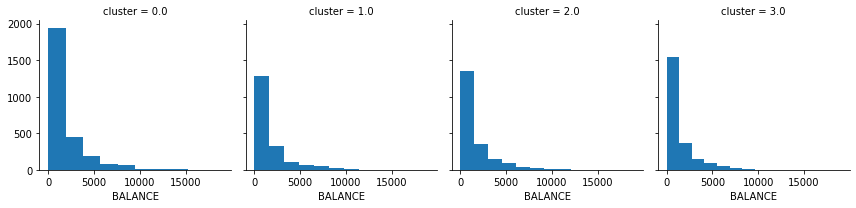

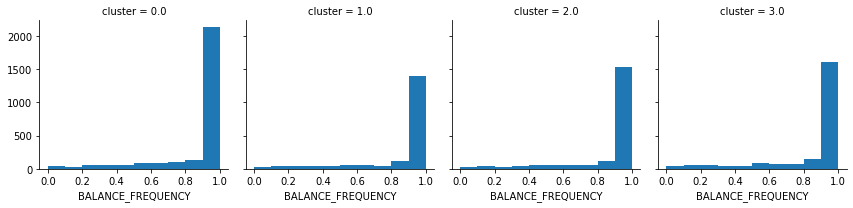

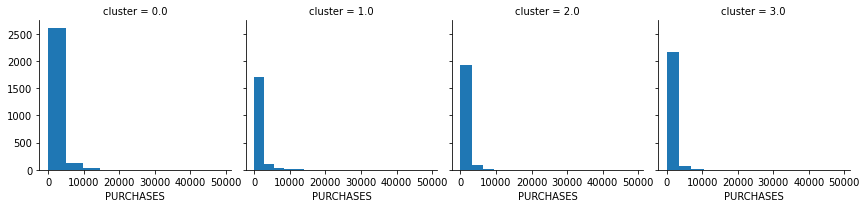

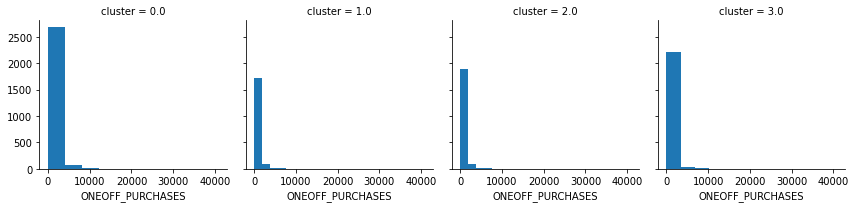

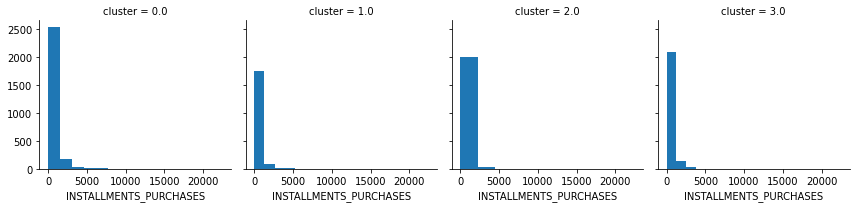

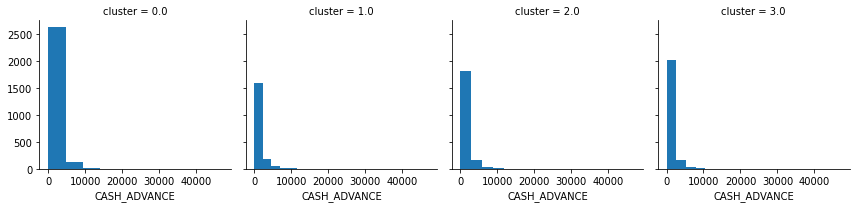

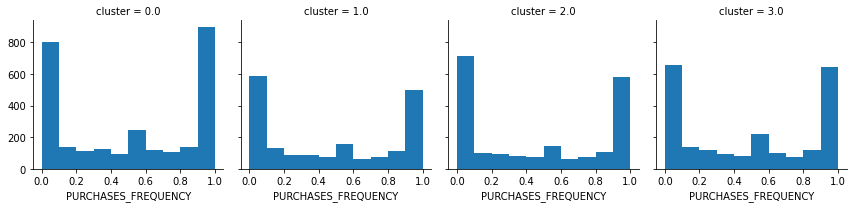

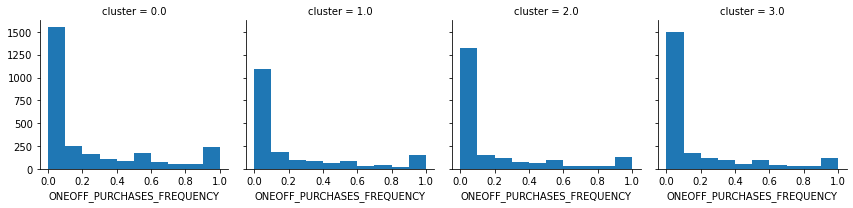

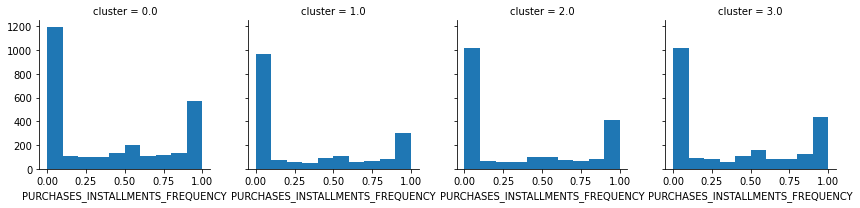

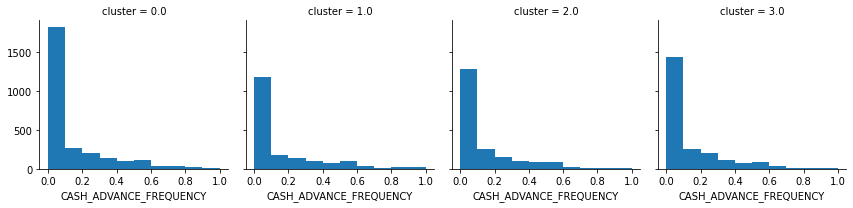

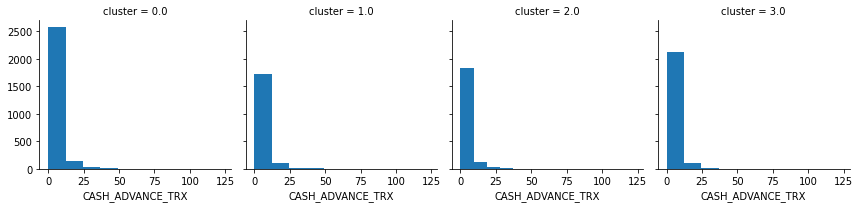

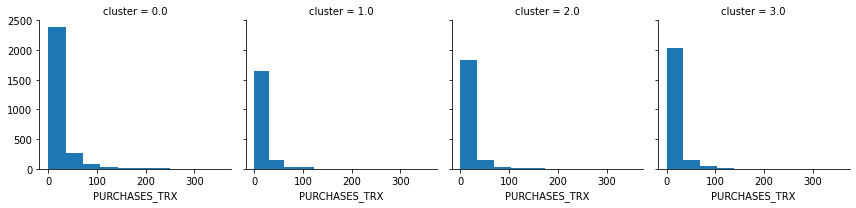

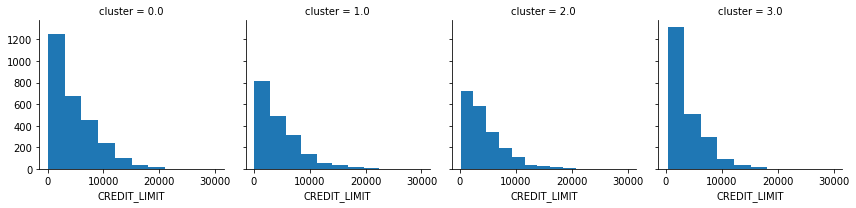

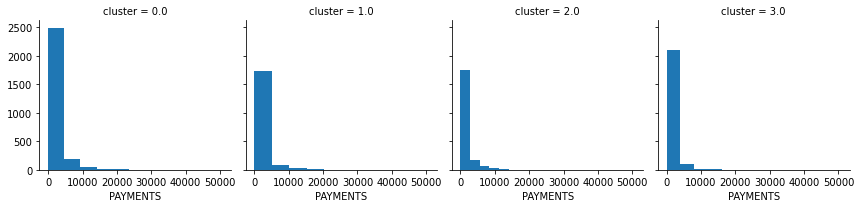

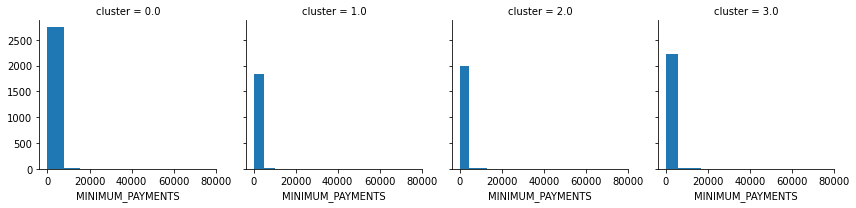

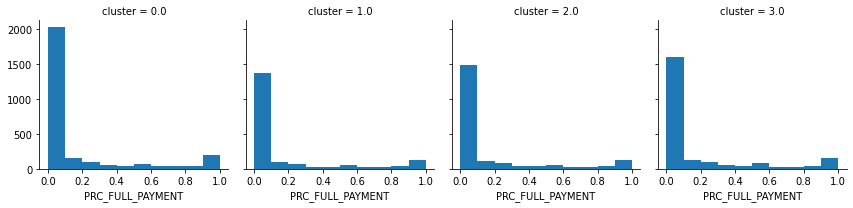

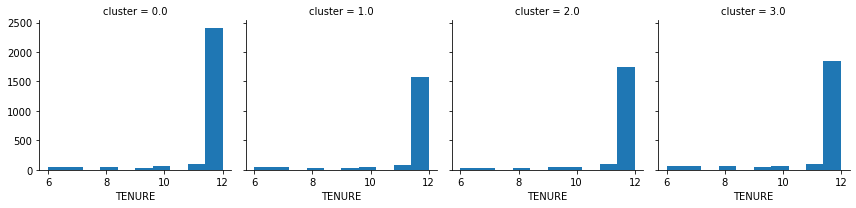

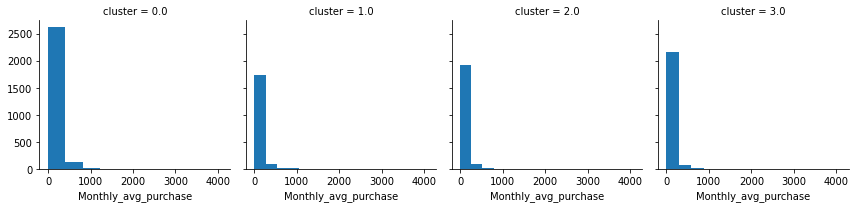

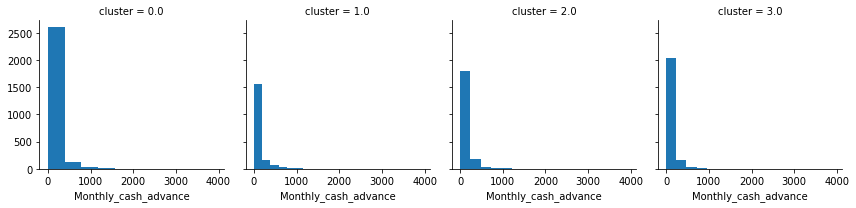

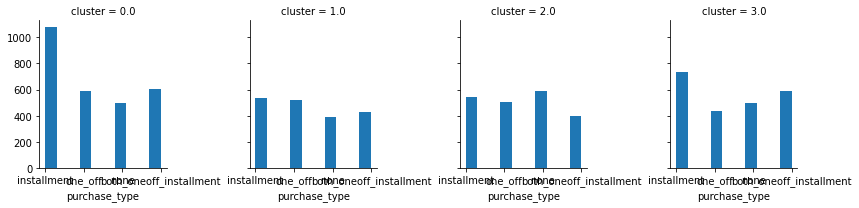

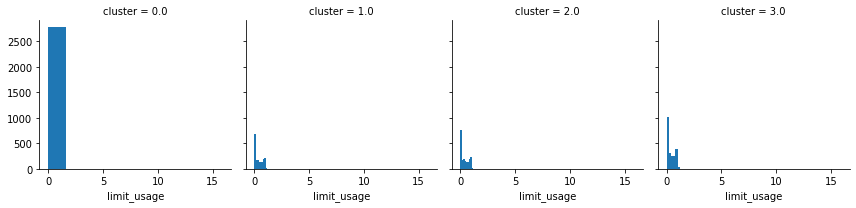

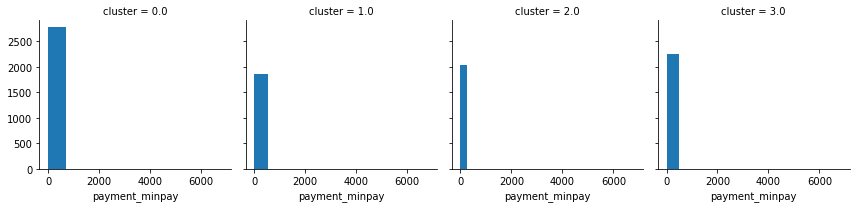

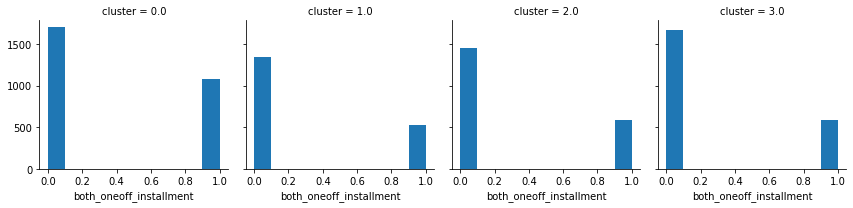

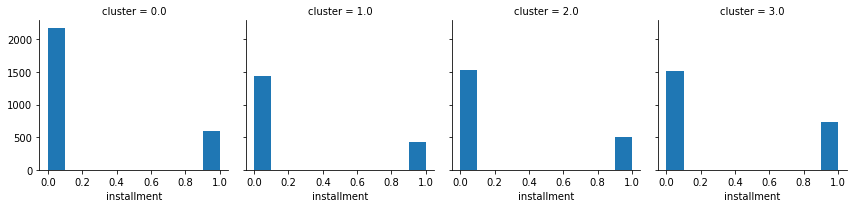

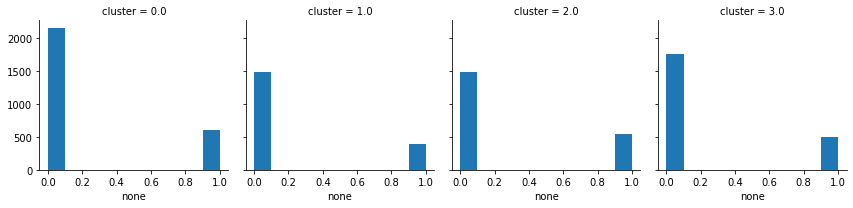

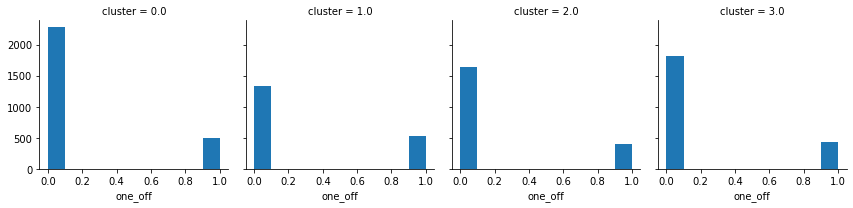

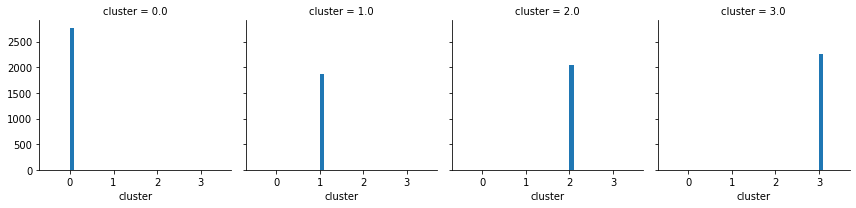

In [ ]:
for c in clusters_agg:
    grid= sns.FacetGrid(clusters_agg, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
finalDf_agg = pd.concat([principalDf, pd.DataFrame({'cluster':model.labels_})], axis = 1)
finalDf_agg.head()

,principal component 1,principal component 2,cluster
0,-0.245470,-2.761959,3
1,-3.980801,0.159355,2
2,1.288445,1.494095,1
3,-1.048355,0.661232,1
4,-1.451698,-0.183328,1


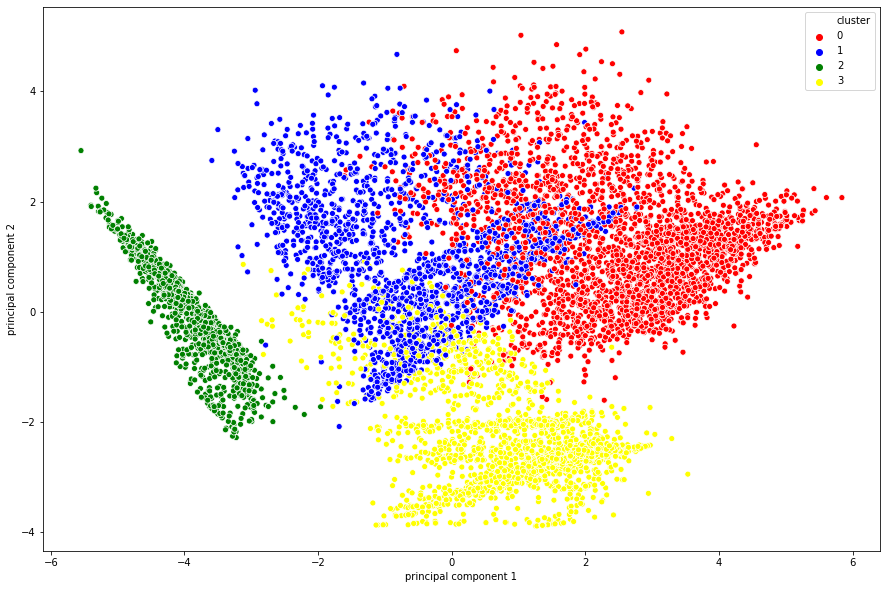

In [ ]:
#Hierarchichal Clustering
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf_agg,palette=['red','blue','green','yellow'])
plt.show()

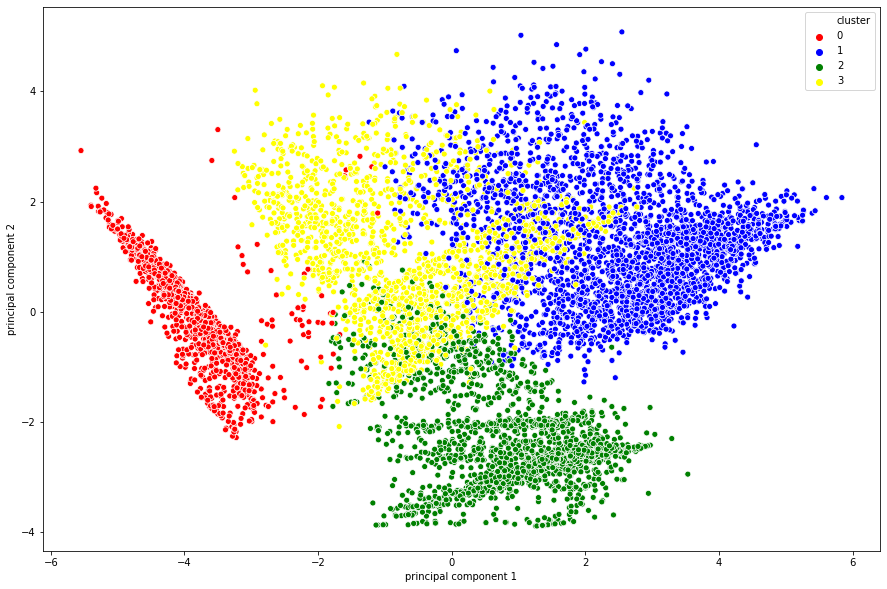

In [ ]:
#PCA
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green','yellow'])
plt.show()